In [21]:
#Importing Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [23]:
# Loading and Preparing the data

mlr_df = pd.read_csv(r'D:\NCI Sem 1\Statistics and Optimization\mlr6.csv')
mlr_df       

,y,x1,x2,x3
0,16270.189819,54.290459,196.243633,C
1,18169.456998,54.065187,204.141635,A
2,15559.583612,51.437386,198.786582,A
3,16087.907983,52.206995,194.490189,C
4,16374.396237,55.142860,197.968667,C
...,...,...,...,...
995,17040.498736,50.520233,197.697608,B
996,15520.434125,54.289348,201.463613,C
997,13347.377195,43.533605,202.239624,A
998,13693.862787,49.107846,197.030690,C


In [25]:
#checking datatypes of columns
mlr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


In [89]:
# For numeric variables
mlr_df.describe()

,y,x1,x2
count,1000.000000,1000.000000,1000.000000
mean,15461.118352,49.995868,199.921427
std,1795.134480,4.914345,4.348718
min,7972.734953,33.147892,186.235221
25%,14434.325581,47.268212,197.441882
50%,15521.006387,49.963315,199.910862
75%,16538.968858,53.006301,202.461691
max,21565.781403,69.425729,214.460893


In [91]:
# For categorical variables
mlr_df['x3'].value_counts()

x3
B    403
A    306
C    291
Name: count, dtype: int64

In [31]:
# Defining the X and Y variables for prediction

X = mlr_df[['x1', 'x2', 'x3']]                   # columns x1,x2 and x3_B, x3_C are exploratory or independent variables
Y = mlr_df[['y']]                                # column y is the dependent variable to predict output

In [33]:
print("\nIndependent Variables: ", X)


Independent Variables:              x1          x2 x3
0    54.290459  196.243633  C
1    54.065187  204.141635  A
2    51.437386  198.786582  A
3    52.206995  194.490189  C
4    55.142860  197.968667  C
..         ...         ... ..
995  50.520233  197.697608  B
996  54.289348  201.463613  C
997  43.533605  202.239624  A
998  49.107846  197.030690  C
999  55.033842  199.041458  A

[1000 rows x 3 columns]


In [35]:
print("\nIndependent Variables: ", Y)


Independent Variables:                  y
0    16270.189819
1    18169.456998
2    15559.583612
3    16087.907983
4    16374.396237
..            ...
995  17040.498736
996  15520.434125
997  13347.377195
998  13693.862787
999  15370.806516

[1000 rows x 1 columns]


In [37]:
'''
For fitting MLR to the dataset we need columns to have same datatypes and column x3 has categorical or ordered data which is not numerical
so by using one-hot encoding we can convert categorical values to binary format for smooth interpreting of regression model.
'''
X = pd.get_dummies(X, columns=['x3'], drop_first=True).astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3_B    1000 non-null   float64
 3   x3_C    1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


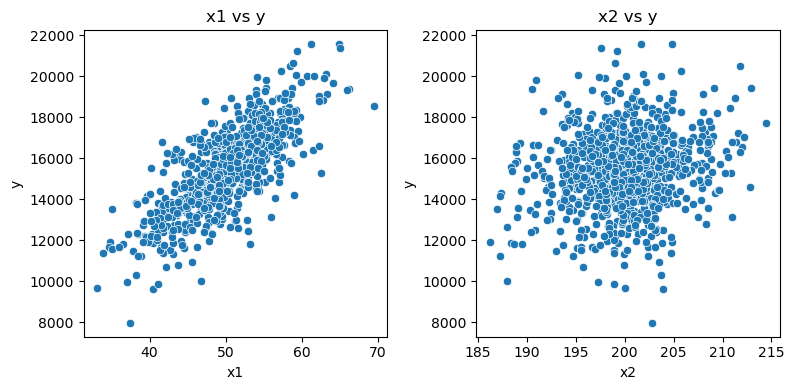

In [49]:
#Checking Linearity relationship between depedent and independent variables indiviusally
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for continuous variables
plt.figure(figsize=(8, 4))

# x1 vs y
plt.subplot(1, 2, 1)
sns.scatterplot(x=X['x1'], y=mlr_df['y'])
plt.title('x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')

# x2 vs y
plt.subplot(1, 2, 2)
sns.scatterplot(x=X['x2'], y=mlr_df['y'])
plt.title('x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

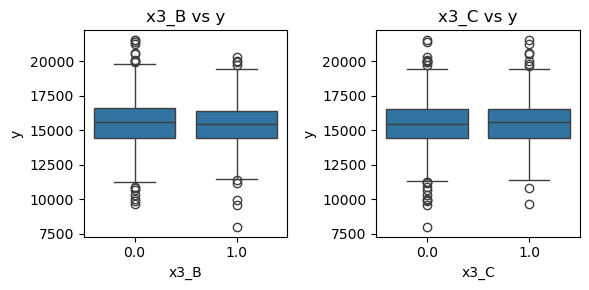

In [47]:
# Checking linearity for categorical variables x3_B and x3_C 
plt.figure(figsize=(6, 3))

# x3_B vs y
plt.subplot(1, 2, 1)
sns.boxplot(x=X['x3_B'], y=mlr_df['y'])
plt.title('x3_B vs y')
plt.xlabel('x3_B')
plt.ylabel('y')

# x3_C vs y
plt.subplot(1, 2, 2)
sns.boxplot(x=X['x3_C'], y=mlr_df['y'])
plt.title('x3_C vs y')
plt.xlabel('x3_C')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [51]:
# Spliting the dataset into train and test dataset for predictions

#Using a 70-30% ratio for train and test dataset and used a random seed as mentioned 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 23122366)

print(X_train.dtypes)
print(Y_train.dtypes)

x1      float64
x2      float64
x3_B    float64
x3_C    float64
dtype: object
y    float64
dtype: object


In [53]:
X_train.head(), Y_train.head()

(            x1          x2  x3_B  x3_C
 191  52.446255  200.831173   0.0   1.0
 632  48.755303  196.390378   0.0   0.0
 138  50.149503  207.362768   1.0   0.0
 848  53.130927  195.250284   0.0   0.0
 447  50.083583  199.559490   0.0   0.0,
                 y
 191  17974.347422
 632  15311.786106
 138  15720.354623
 848  15574.886900
 447  15460.386573)

In [75]:
import statsmodels.api as sm

# Add a constant to the training set for the intercept
X_train = sm.add_constant(X_train)

# Fit the multiple linear regression model
model = sm.OLS(Y_train, X_train).fit()

# Display the summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     287.7
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          8.79e-146
Time:                        20:59:13   Log-Likelihood:                -5898.4
No. Observations:                 700   AIC:                         1.181e+04
Df Residuals:                     695   BIC:                         1.183e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.491e+04   1997.415     -7.465      0.000   -1.88e+04    -1.1e+04
x1           281.6864      8.477     33.230      0.000     265.043     298.330
x2            81.8472      9.615      8.512      0.000      62.969     100.726
x3_B        -173.7585    100.282     -1.733      0.084    -370.651      23.134
x3_C         -63.9812    108.218     -0.591      0.555    -276.455     148.493
==============================================================================
Omnibus:                       37.805   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.063
Skew:                          -0.233   Prob(JB):                     3.08e-22
Kurtosis:                       4.783   Cond. No.                     9.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
print(X_train)

     const         x1          x2  x3_B  x3_C
191    1.0  52.446255  200.831173   0.0   1.0
632    1.0  48.755303  196.390378   0.0   0.0
138    1.0  50.149503  207.362768   1.0   0.0
848    1.0  53.130927  195.250284   0.0   0.0
447    1.0  50.083583  199.559490   0.0   0.0
..     ...        ...         ...   ...   ...
238    1.0  49.719843  198.259233   0.0   0.0
785    1.0  48.276711  197.398267   0.0   0.0
90     1.0  55.810744  194.661680   0.0   1.0
987    1.0  43.713849  200.828449   0.0   0.0
473    1.0  49.511423  193.934556   1.0   0.0

[700 rows x 5 columns]


In [79]:
# Evaluating model on the test dataset
from sklearn.metrics import mean_absolute_error
X_test_const = sm.add_constant(X_test)  # Add constant to X_test as well
Y_pred = model.predict(X_test_const)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae = mean_absolute_error(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1173875.2722407894
R-squared: 0.6276216600308678
Root Mean Squared Error: 1083.4552469949044
Mean Absolute Error: 786.027779046658


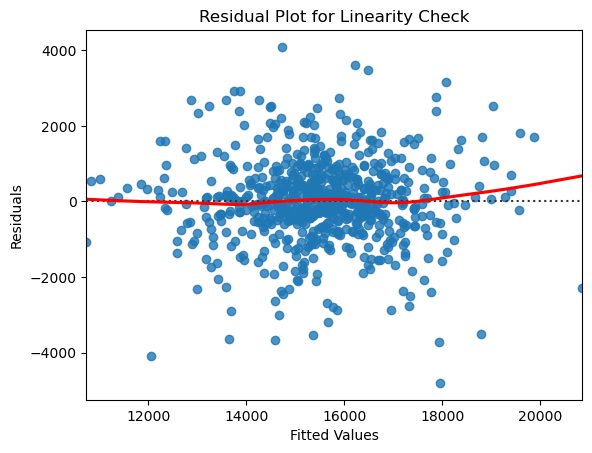

In [61]:
# Using suitable visualizations and appropriate statistical tests to discuss if the final model meets the Gauss-Markov assumptions.

#Step 1: Check Linearity
import matplotlib.pyplot as plt
import seaborn as sns

sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linearity Check")
plt.show()

In [65]:
#Step 2: No Perfect Multicollinearity should exist
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Features"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.drop(0)

vif_data

,Features,VIF
1,x1,1.003839
2,x2,1.005249
3,x3_B,1.372920
4,x3_C,1.373305


In [67]:
#Step 3: Homoscedasticity (Constant Variance of Errors)
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")

Breusch-Pagan Test p-value: 0.563191409595341


In [69]:
#Step 4: No Autocorrelation of Residuals
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 2.043089901188692


In [71]:
# Using Shapiro-Wilk Statistical test for normality
from scipy.stats import shapiro

shapiro_test = shapiro(model.resid)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test p-value: 4.1505345775889463e-10


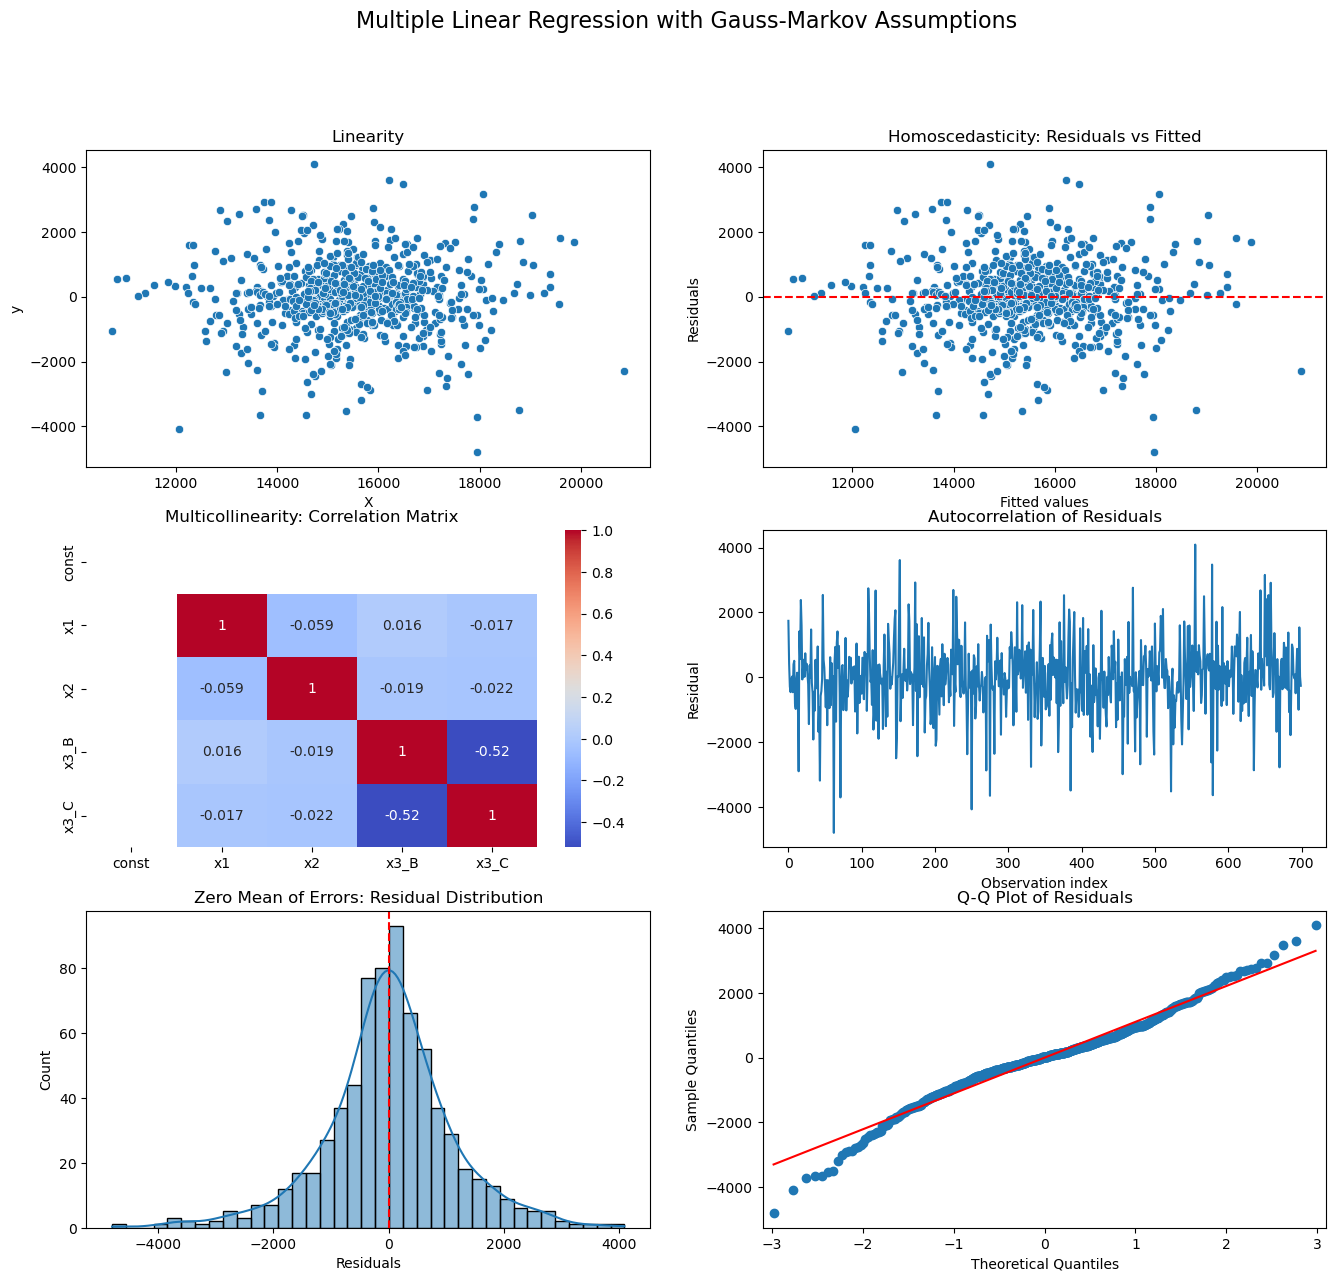

<Figure size 640x480 with 0 Axes>

In [87]:
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Multiple Linear Regression with Gauss-Markov Assumptions", fontsize=16)

# 1. Linearity Assumption:
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=axs[0, 0])
axs[0, 0].set_title("Linearity")
axs[0, 0].set_xlabel("X")
axs[0, 0].set_ylabel("y")

# 2. Homoscedasticity Assumption:
residuals = model.resid
predicted_values = model.predict(model.model.exog)
sns.scatterplot(x=predicted_values, y=residuals, ax=axs[0, 1])
axs[0, 1].set_title("Homoscedasticity: Residuals vs Fitted")
axs[0, 1].axhline(0, color='red', linestyle='--')
axs[0, 1].set_xlabel("Fitted values")
axs[0, 1].set_ylabel("Residuals")

# 3. No Multicollinearity:
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title("Multicollinearity: Correlation Matrix")

#4. No Autocorrelation of Residuals
sns.lineplot(x=np.arange(len(model.resid)), y=model.resid, ax=axs[1, 1])
axs[1, 1].set_title("Autocorrelation of Residuals")
axs[1, 1].set_xlabel("Observation index")
axs[1, 1].set_ylabel("Residual")

# 5. Zero Mean of Errors: Distribution of residuals
sns.histplot(model.resid, kde=True, ax=axs[2, 0])
axs[2, 0].set_title("Zero Mean of Errors: Residual Distribution")
axs[2, 0].set_xlabel("Residuals")
axs[2, 0].axvline(0, color='red', linestyle='--')

sm.qqplot(model.resid, line="s", ax=axs[2, 1])
axs[2, 1].set_title("Q-Q Plot of Residuals")
plt.show()

plt.tight_layout( rect=[0, 0.03, 1, 0.95])
plt.show()